# Tensorflow Project Exercise

Bank Authentication Data Set from UCI repository

In [1]:
import pandas as pd     #import pandas

In [2]:
df = pd.read_csv('bank_note_data.csv')   #read file

In [3]:
df.head()      #head of dataframe

Image.Var  Image.Skew  Image.Curt  Entropy  Class
0    3.62160      8.6661     -2.8073 -0.44699      0
1    4.54590      8.1674     -2.4586 -1.46210      0
2    3.86600     -2.6383      1.9242  0.10645      0
3    3.45660      9.5228     -4.0112 -3.59440      0
4    0.32924     -4.4552      4.5718 -0.98880      0

In [4]:
import matplotlib.pyplot as plt         #data visualization tools
import seaborn as sns
%matplotlib inline

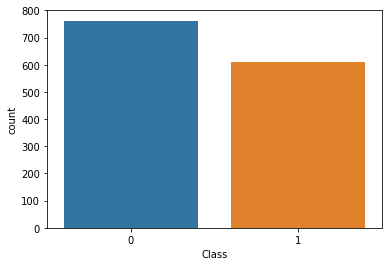

In [6]:
sns.countplot(x = 'Class', data = df)   #countplot of class column

/Users/obinnaisiwekpeni/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/obinnaisiwekpeni/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


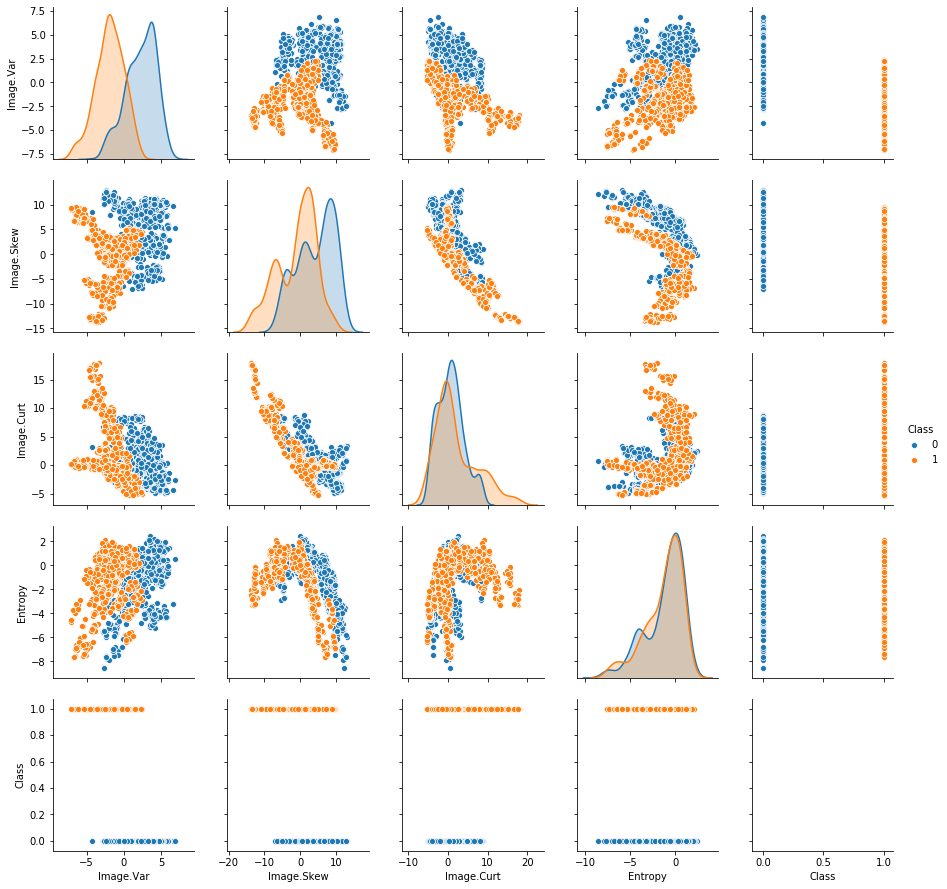

In [7]:
sns.pairplot(df,hue='Class')  #pairplot with Class column as hue

In [8]:
from sklearn.preprocessing import StandardScaler      #standardscaler module

In [9]:
scaler = StandardScaler()          #scaler object

In [10]:
scaler.fit(df.drop('Class',axis= 1))      #fit the standardized data

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features = scaler.fit_transform(df.drop('Class',axis=1))       #transform standardized data

In [12]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [13]:
df_feat.head()

Image.Var  Image.Skew  Image.Curt   Entropy
0   1.121806    1.149455   -0.975970  0.354561
1   1.447066    1.064453   -0.895036 -0.128767
2   1.207810   -0.777352    0.122218  0.618073
3   1.063742    1.295478   -1.255397 -1.144029
4  -0.036772   -1.087038    0.736730  0.096587

In [26]:
from sklearn.model_selection import train_test_split       #train_test_split 

In [29]:
X = df_feat
y = df['Class']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [48]:
import tensorflow as tf       #import tensorflow

In [49]:
df_feat.columns      #feature columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [50]:
feat_cols = []                                         

for col in df_feat.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))      #list of feature column object using tensorflow feature column

In [51]:
feat_cols

[NumericColumn(key='Image.Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Image.Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Image.Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [64]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10, 20, 10], n_classes=2,feature_columns=feat_cols,model_dir= '/var/folders/71/w6q15_p142j6dfzj_ggh8ltw0000gn/T/tmpfp6_z4d6')#create a classifier using DNNclassifier

In [65]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=20,shuffle=True) #create an input into the network

In [66]:
classifier.train(input_fn=input_func,steps=500)  #train the input

In [67]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)   #make predictions

In [70]:
final_preds  = []
for pred in note_predictions:
    final_preds.append(pred['class_ids'][0])            #focus on the target predictions

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
print(confusion_matrix(y_test,final_preds))

[[227   2]
 [  0 183]]


In [73]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       229
           1       0.99      1.00      0.99       183

    accuracy                           1.00       412
   macro avg       0.99      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

